Appris :
- La structure du réseaux de neurones est très importantes (pour moons, [5,5,1] ne convient pas mais [4,4,1] bcp plus)
- La vitesse de descente de h est importante (linéaire, géométrique, autre loi), Il ne faut PAS descendre trop vite !
- L'initialisation du réseaux de neurones est importantes (regéréré tant que le loss est trop haut ?)

A faire :
- h variable en fonction du loss
- Plus d'entrées et de sorties
- Evolution en directe du graph de loss
- Avec pytorche

In [163]:
# Imports
import matplotlib.pyplot as plt
import numpy as np

from structures import Value, Neuron, Layer, MLP
from visualization_functions import *
from others_functions import *
from sklearn.datasets import make_moons, make_circles, make_blobs

In [164]:
# Structuration
mlp = MLP(2, [4, 4, 1]) # 2 inputs, 4 hidden layers with 5 neurons each, 1 output

In [165]:
# Training set
X, Y = make_moons(n_samples=100, noise=0.1, random_state=0)
#X, Y = make_blobs(n_samples=100, centers=2, random_state=0)
#plt.scatter(X[:, 0], X[:, 1], c=Y)
Xs = [[float(x[0]), float(x[1])] for x in X] # Utilise une fonction mieux ...
Ys = [float(y) for y in Y]

In [166]:

def grad_descent(n, xs, ys, h, epsilon):
    n.reset_grad()
    ypred = [mlp(x) for x in xs]
    loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
    loss.backward()
    for n in mlp.parameters():
        n.data -= h * n.grad
    if loss.data < epsilon:
        return True, loss, ypred
    return False, loss, ypred

max_iter = 100
is_finised = False
epsilon = 0.001
h_init = 0.01
h = h_init
h_min = 0.001
loss_list = []
h_list = []
while max_iter > 0 and not is_finised:
    max_iter -= 1
    is_finised, loss, ypred = grad_descent(mlp, Xs, Ys, h, epsilon)
    loss_list.append(loss.data/len(Xs))
    h_list.append(h)
    print(f"{max_iter}, Loss: {loss.data:.4f}, {h}")
    h -= h_init / (max_iter+1)
    h = max(h, h_min)
    





99, Loss: 231.2259, 0.01
98, Loss: 205.9197, 0.0099
97, Loss: 82.6604, 0.0097989898989899
96, Loss: 27.9492, 0.009696949082663369
95, Loss: 28.3693, 0.009593856299158215
94, Loss: 33.3005, 0.009489689632491548
93, Loss: 15.6137, 0.009384426474596811
92, Loss: 16.7268, 0.009278043495873406
91, Loss: 19.9293, 0.009170516614152977
90, Loss: 16.2832, 0.009061820961979064
89, Loss: 18.3575, 0.008951930852088954
88, Loss: 14.6017, 0.008840819740977843
87, Loss: 16.1845, 0.008728460190416046
86, Loss: 14.0074, 0.008614823826779682
85, Loss: 14.9072, 0.00849988129804405
84, Loss: 13.2363, 0.008383602228276608
83, Loss: 13.6351, 0.008265955169453078
82, Loss: 12.5102, 0.00814690755040546
81, Loss: 12.6122, 0.008026425622694617
80, Loss: 11.8041, 0.007904474403182421
79, Loss: 11.7441, 0.007781017613058964
78, Loss: 11.1620, 0.007656017613058964
77, Loss: 11.0251, 0.007529435334577951
76, Loss: 10.5911, 0.007401230206372823
75, Loss: 10.4107, 0.007271360076502693
74, Loss: 10.0703, 0.00713978112

Final Loss: 7.6208


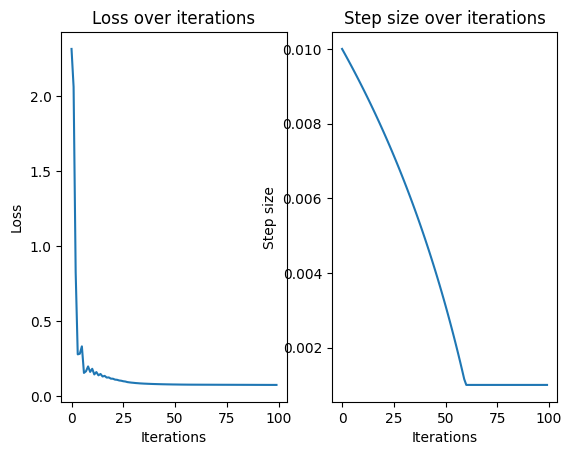

In [167]:
plt.subplot(1, 2, 1)
print(f"Final Loss: {loss.data:.4f}")
# Plotting
plt.plot(loss_list)
plt.title("Loss over iterations")
plt.xlabel("Iterations")
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
plt.plot(h_list)
plt.title("Step size over iterations")
plt.xlabel("Iterations")
plt.ylabel("Step size")
plt.show()



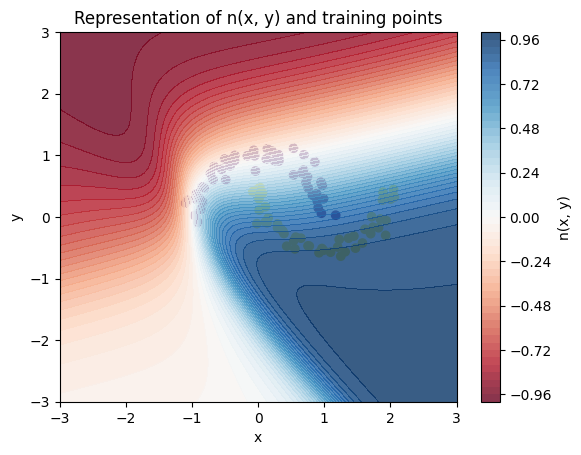

In [168]:
# Create a grid of points for visualization

plt.scatter(X[:, 0], X[:, 1], c=Y)

x_range = np.linspace(-3, 3, 100)
y_range = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = np.array([[mlp([x, y, 0]).data for x, y in zip(row_x, row_y)] for row_x, row_y in zip(X, Y)])



# Plot the decision boundary and points
plt.contourf(X, Y, Z, levels=50, cmap="RdBu", alpha=0.8)
plt.colorbar(label="n(x, y)")

# Plot the training points
#for i, (x, y) in enumerate(xs):
    #plt.scatter(x, y, c="white" if ys[i] > 0 else "black", edgecolor="k", s=100, label=f"ys={ys[i]}" if i == 0 else "")

plt.title("Representation of n(x, y) and training points")
plt.xlabel("x")
plt.ylabel("y")
#plt.legend(["ys=1.0", "ys=-1.0"], loc="upper right")
plt.show()
# Add a colorbar to the plot



